In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
country_df = pd.read_csv('Country-data.csv')
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Multivariate Analysis

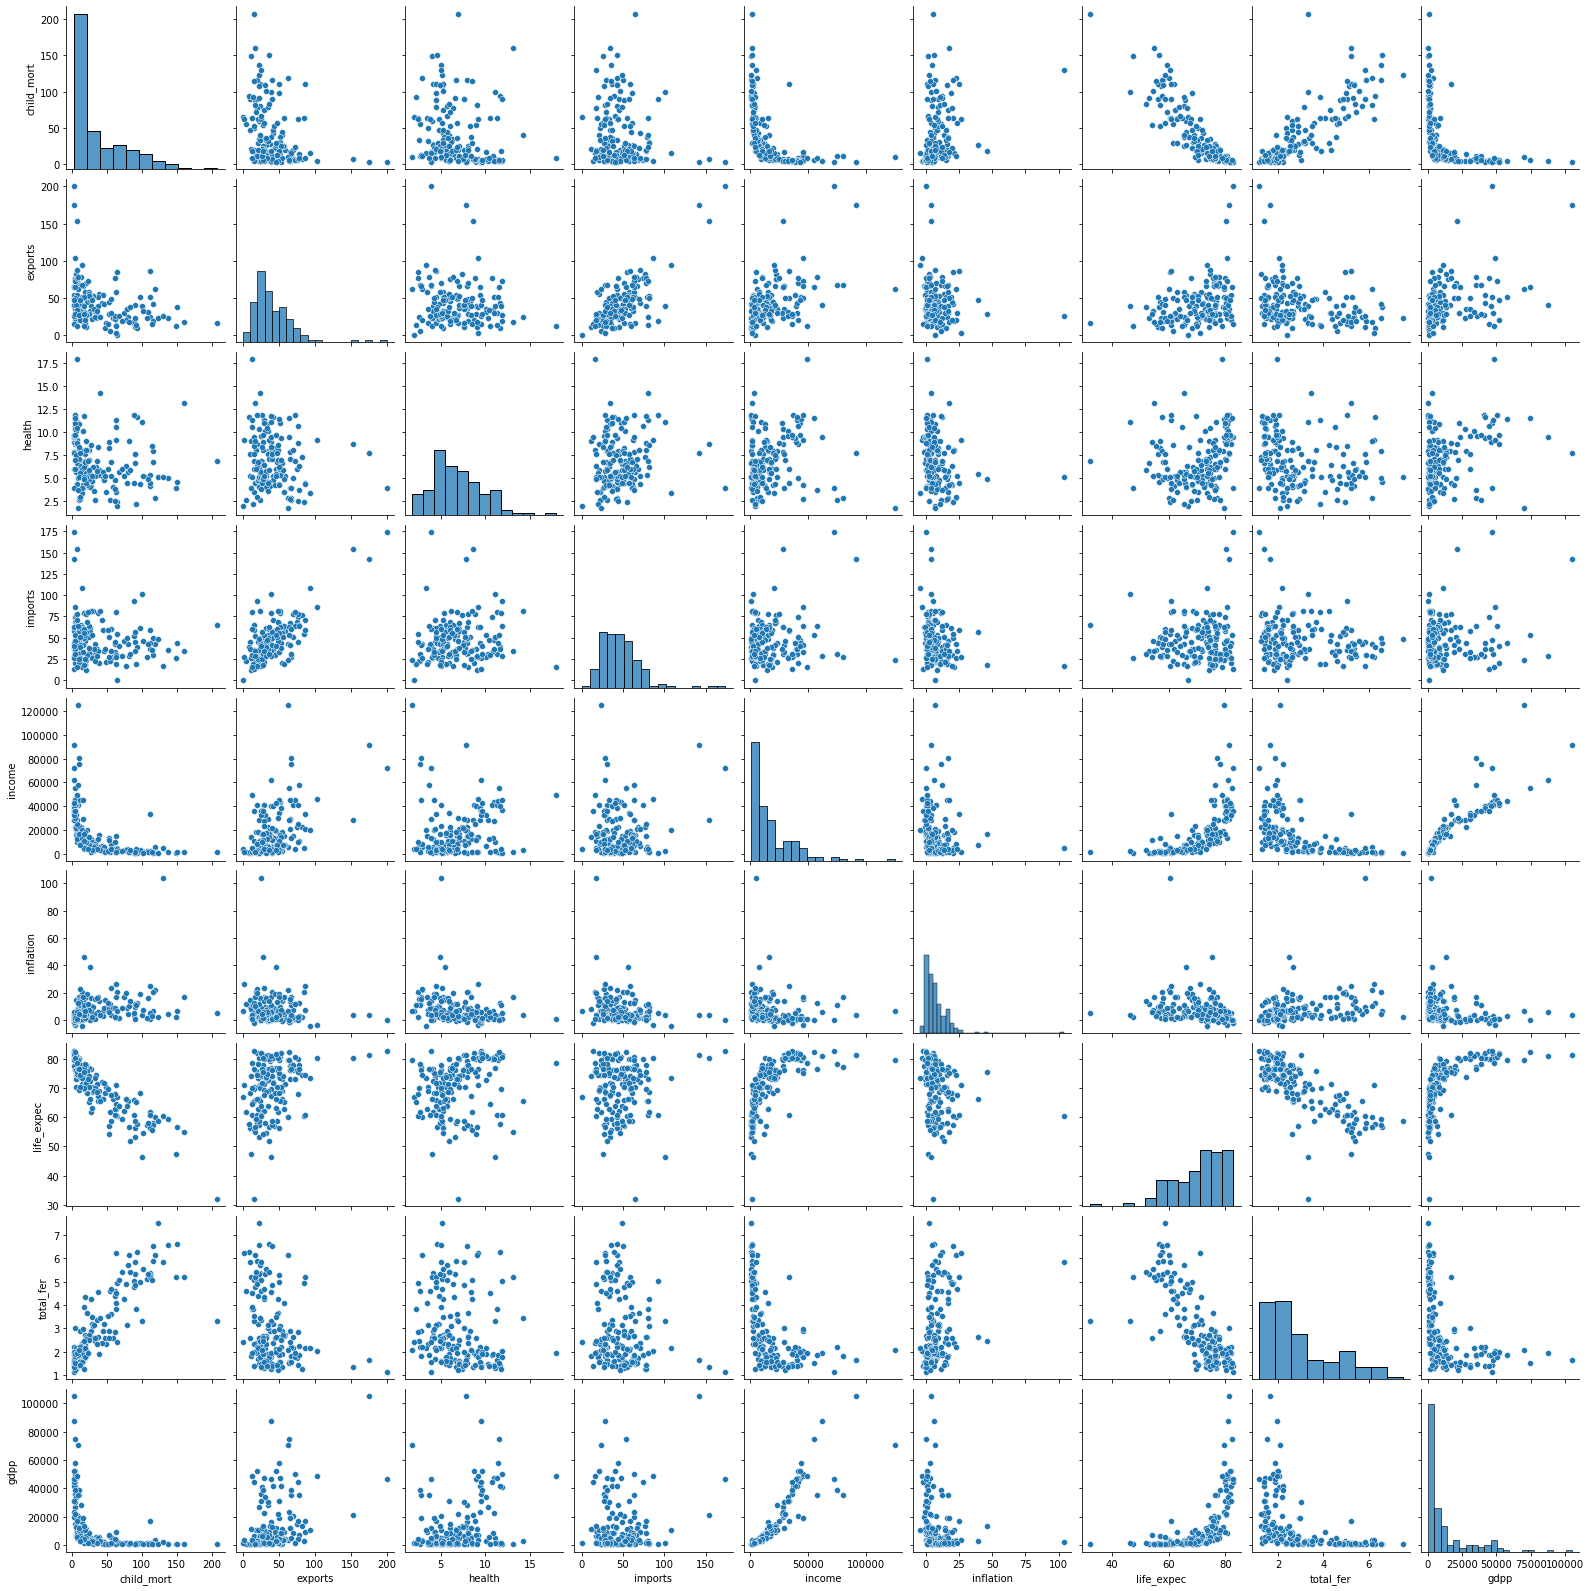

In [3]:
#Multivariate Analysist
sns.pairplot(country_df)
# plt.savefig('pairplot.png')
plt.show()

<AxesSubplot:>

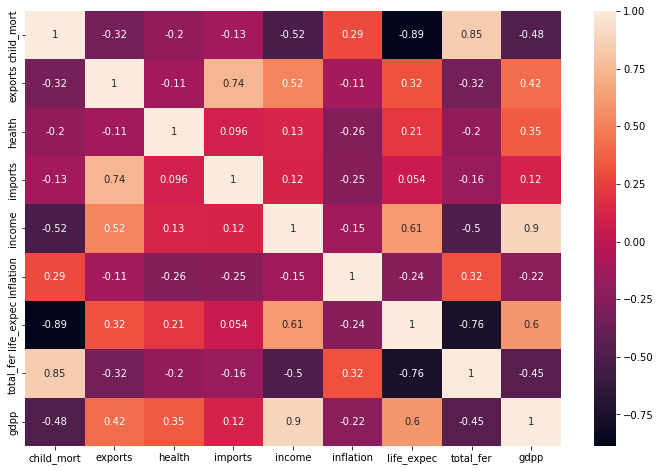

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(country_df.corr(), annot=True)

# plt.savefig('heatmap.png')

## Data Cleaning

In [5]:
selected_df = country_df[['country', 'income', 'child_mort', 'gdpp']]
selected_df

,country,income,child_mort,gdpp
0,Afghanistan,1610,90.2,553
1,Albania,9930,16.6,4090
2,Algeria,12900,27.3,4460
3,Angola,5900,119.0,3530
4,Antigua and Barbuda,19100,10.3,12200
...,...,...,...,...
162,Vanuatu,2950,29.2,2970
163,Venezuela,16500,17.1,13500
164,Vietnam,4490,23.3,1310
165,Yemen,4480,56.3,1310


In [6]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   income      167 non-null    int64  
 2   child_mort  167 non-null    float64
 3   gdpp        167 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.3+ KB


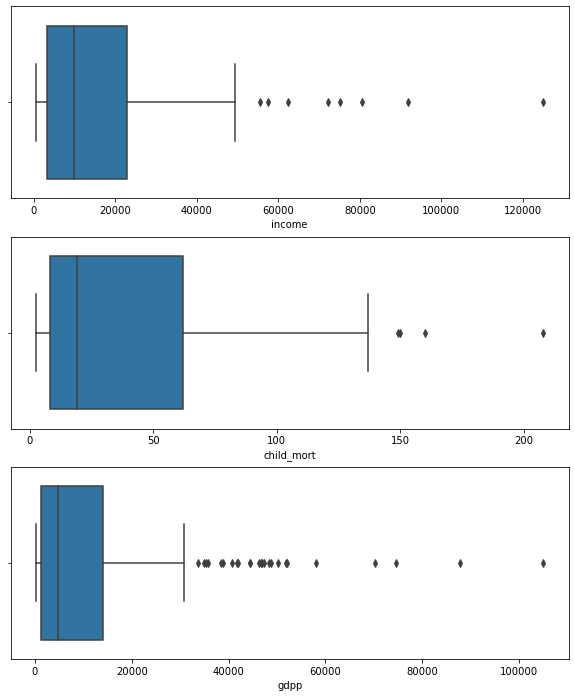

In [7]:
fig = plt.subplots(figsize=(10, 12))

for i, col in enumerate(selected_df.drop('country', axis=1).columns):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x=selected_df[col])
# plt.savefig('outlier1.png')

In [8]:
def remove_outlier(df, col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - iqr * 1.5
    upper_bound = q3 + iqr * 1.5
    
    df.loc[(df[col] > upper_bound), col] = upper_bound
    df.loc[(df[col] < lower_bound), col] = upper_bound
    
    return df

selected_df = remove_outlier(selected_df, 'income')
selected_df = remove_outlier(selected_df, 'child_mort')
selected_df = remove_outlier(selected_df, 'gdpp')

selected_df

,country,income,child_mort,gdpp
0,Afghanistan,1610.0,90.2,553
1,Albania,9930.0,16.6,4090
2,Algeria,12900.0,27.3,4460
3,Angola,5900.0,119.0,3530
4,Antigua and Barbuda,19100.0,10.3,12200
...,...,...,...,...
162,Vanuatu,2950.0,29.2,2970
163,Venezuela,16500.0,17.1,13500
164,Vietnam,4490.0,23.3,1310
165,Yemen,4480.0,56.3,1310


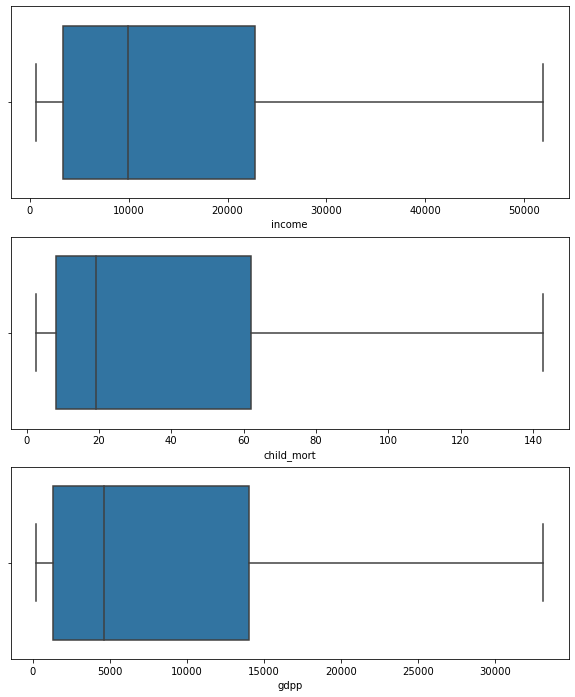

In [9]:
fig = plt.subplots(figsize=(10, 12))

for i, feature in enumerate(selected_df.drop('country', axis=1).columns):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x=selected_df[feature])
# plt.savefig('outlier2.png')

## Univariate Analysis

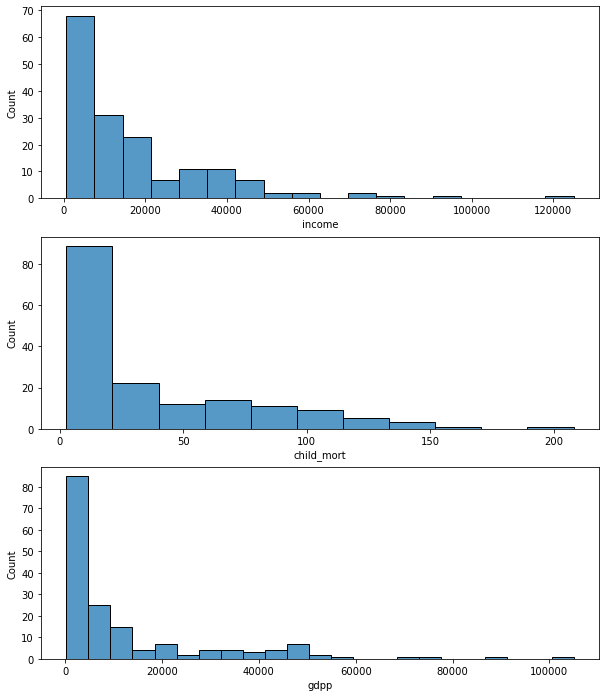

In [10]:
fig = plt.subplots(figsize=(10,12))

for i,col in enumerate(selected_df.drop('country', axis=1).columns):
    plt.subplot(3, 1, i+1)
    sns.histplot(country_df[col])
# plt.savefig('univariate.png')

## Bivariate Analysis

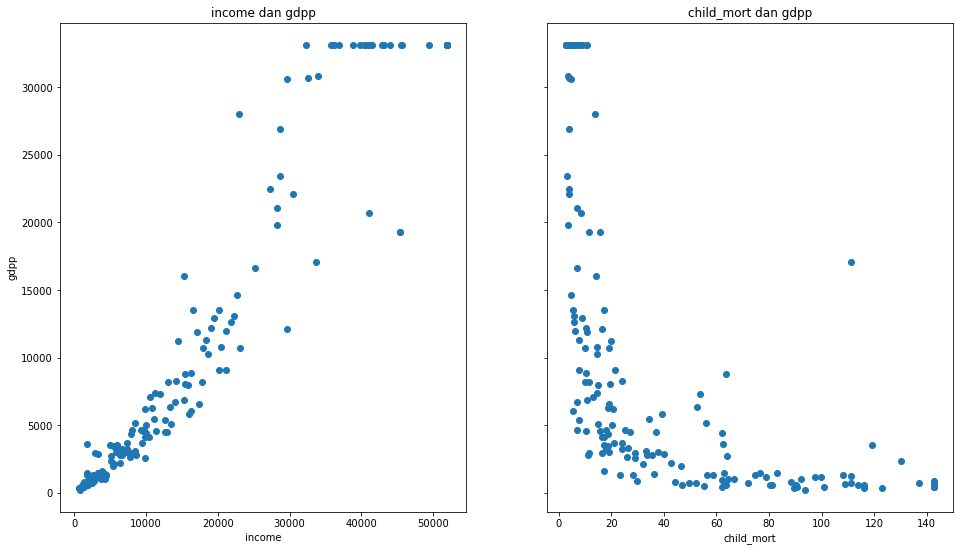

In [11]:
fig, ax = plt.subplots(figsize=(16,9), ncols=2, sharey=True)
ax[0].scatter(x='income', y='gdpp', data=selected_df)
ax[1].scatter(x='child_mort', y='gdpp', data=selected_df)

ax[0].set_title('income dan gdpp')
ax[1].set_title('child_mort dan gdpp')


ax[0].set(xlabel='income', ylabel='gdpp')
ax[1].set(xlabel='child_mort')

# plt.savefig('scatter.png')
plt.show()

## Clustering

In [12]:
sc = StandardScaler()
scaled_data = sc.fit_transform(selected_df[['income','child_mort','gdpp']])

scaled_df = pd.DataFrame(scaled_data, columns=['income','child_mort','gdpp'])

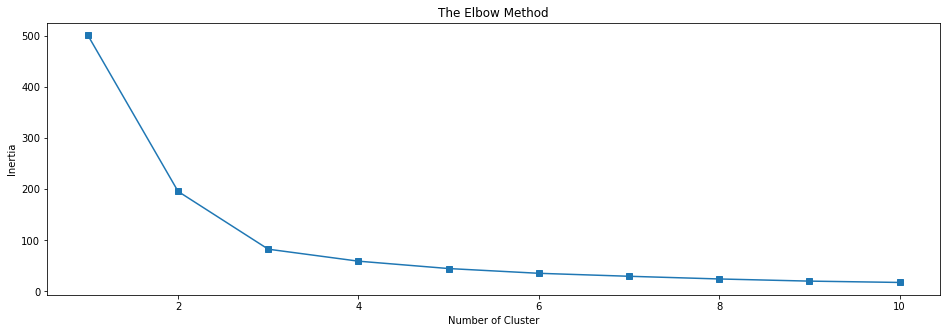

In [13]:
result = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 52)
    kmeans.fit(scaled_df)
    result.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(range(1,11), result, marker='s')
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
# plt.savefig('elbow.png')
plt.show()

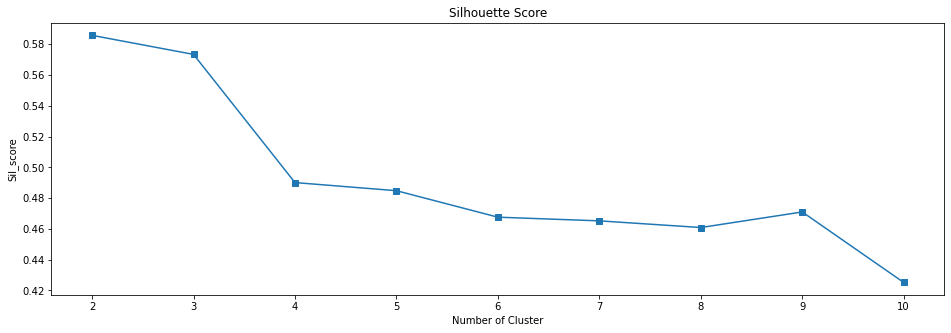

In [14]:
# print(silhouette_score(scaled_df1, labels=scaled_df1['k2_labels']))

sil_score = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 52)
    kmeans.fit(scaled_df)
    sil_score.append(silhouette_score(scaled_df, kmeans.labels_, metric='euclidean'))
#     result.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(16,5))

ax.plot(range(2,11), sil_score, marker='s')
plt.title('Silhouette Score')
plt.xlabel('Number of Cluster')
plt.ylabel('Sil_score')
# plt.savefig('silhouette.png')
plt.show()

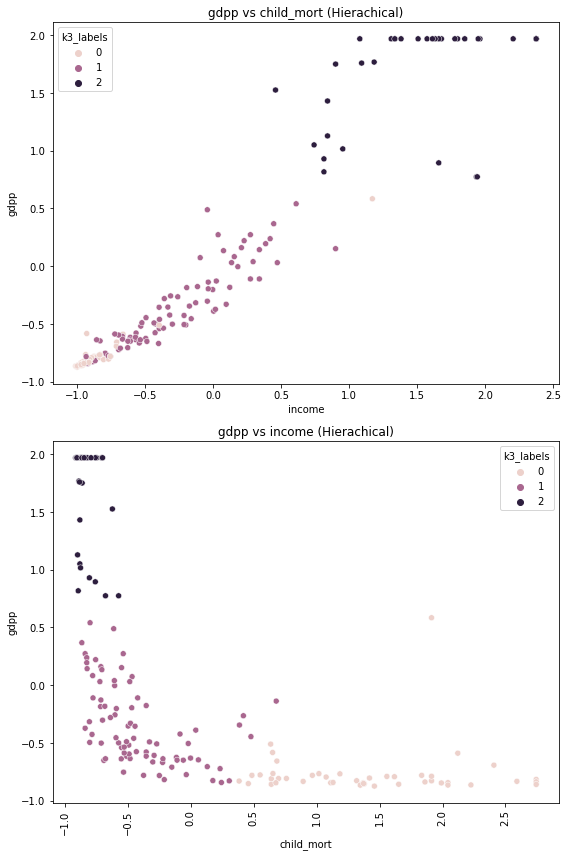

In [15]:
k3 = KMeans(n_clusters=3, random_state=31).fit(scaled_df)
scaled_df['k3_labels'] = k3.labels_

fig = plt.figure(figsize=(8,12))

ax1 = fig.add_subplot(2, 1, 1, title="gdpp vs child_mort (Hierachical)")

ax2 = fig.add_subplot(2, 1, 2, title="gdpp vs income (Hierachical)")

sns.scatterplot(scaled_df['income'], scaled_df['gdpp'], hue=scaled_df['k3_labels'], ax=ax1)

sns.scatterplot(scaled_df['child_mort'], scaled_df['gdpp'], hue=scaled_df['k3_labels'], ax=ax2)

plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('clustering.png')
plt.show()

## Recommendation

In [16]:
clustered_df = selected_df
clustered_df = pd.concat([clustered_df, pd.DataFrame(k3.labels_, columns=['cluster'])], axis = 1)
clustered_df

,country,income,child_mort,gdpp,cluster
0,Afghanistan,1610.0,90.2,553,0
1,Albania,9930.0,16.6,4090,1
2,Algeria,12900.0,27.3,4460,1
3,Angola,5900.0,119.0,3530,0
4,Antigua and Barbuda,19100.0,10.3,12200,1
...,...,...,...,...,...
162,Vanuatu,2950.0,29.2,2970,1
163,Venezuela,16500.0,17.1,13500,1
164,Vietnam,4490.0,23.3,1310,1
165,Yemen,4480.0,56.3,1310,0


In [17]:
final_df = clustered_df[(clustered_df['cluster'] == 0)]
final_df

,country,income,child_mort,gdpp,cluster
0,Afghanistan,1610.0,90.200,553,0
3,Angola,5900.0,119.000,3530,0
17,Benin,1820.0,111.000,758,0
25,Burkina Faso,1430.0,116.000,575,0
26,Burundi,764.0,93.600,231,0
28,Cameroon,2660.0,108.000,1310,0
31,Central African Republic,888.0,142.875,446,0
32,Chad,1930.0,142.875,897,0
36,Comoros,1410.0,88.200,769,0
37,"Congo, Dem. Rep.",609.0,116.000,334,0


## Recommendation

In [18]:
final_df = final_df.sort_values(by=['gdpp','income','child_mort'], ascending=['True','True','False'])[['country','cluster']]
final_df.reset_index().head(10)

,index,country,cluster
0,26,Burundi,0
1,88,Liberia,0
2,37,"Congo, Dem. Rep.",0
3,112,Niger,0
4,132,Sierra Leone,0
5,93,Madagascar,0
6,106,Mozambique,0
7,31,Central African Republic,0
8,94,Malawi,0
9,50,Eritrea,0
